# Image processing with Python

This Colab is my replica of the original [Image Processing with Python](https://datacarpentry.github.io/image-processing/aio.html) course. Review the original course if you want to know more.

[GitHub source code](https://github.com/datacarpentry/image-processing) of the original course.

[My personal Python repository](https://github.com/foobar167/junkyard) on GitHub.

Not all image processing tasks need to be solved using deep learning. A significant portion of tasks and subtasks can be solved without neural networks, using other machine learning methods and image processing algorithms.

Below are ready-made image processing algorithms and machine learning methods packaged in popular libraries: [OpenCV](https://opencv.org/) (Open Computer Vision), [SciPy](https://scipy.org/), [scikit-image](https://scikit-image.org/) and [scikit-learn](https://scikit-learn.org/stable/). Thanks to these and other important libraries such as [NumPy](https://numpy.org/), [Pillow](https://pillow.readthedocs.io/en/stable/), [Matplotlib](https://matplotlib.org/), [pandas](https://pandas.pydata.org/docs/), [jupyter](https://jupyter.org/) and many more, the user can solve many image processing tasks without much effort.

## Tasks

   * Run the source code.
   * In the chapter **"Using contours to count objects"** set `threshold = 200` (change the threshold from 195 to 200) for image "contours_dice.jpg". Check the number of found dots. It should change from 28 to 27. Why? Explain the change in the number of dots on the dice.
   * **Medium difficulty task:** Find and count the number all blue dots on `"contours_dots.jpg"` image.
   * **Medium difficulty task:** Find and count the number all green dots on `"contours_dots.jpg"` image.
   * Experiment with thresholds and other parameters of the algorithms. What changes did you notice in the processed image?
   * Try other image processing algorithms from the libraries above. Try at least one algorithm for each library.
   * *Optional.* Try various OpenCV filters from my [OpenCV Filtering GUI application](https://github.com/foobar167/junkyard/tree/master/opencv_filtering) software. You should have web-camera.

Example of processed image:

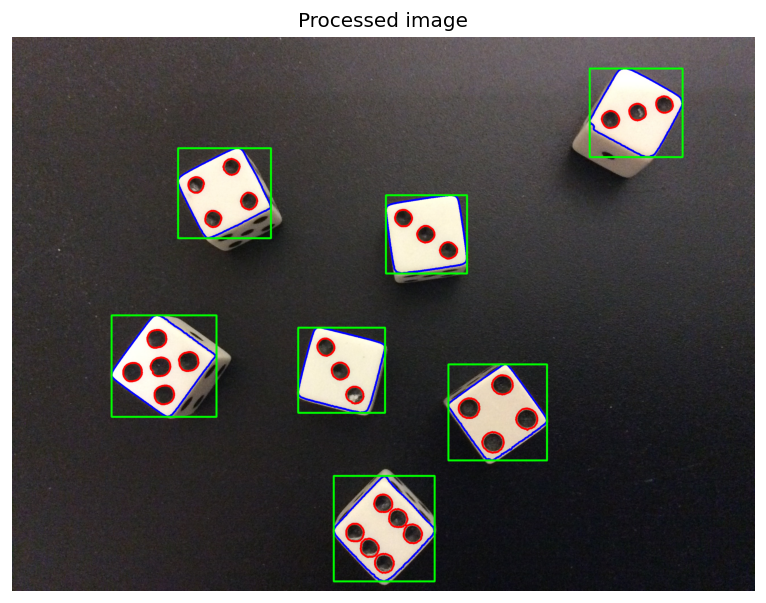

## Make preparations

All necessary modules are already installed in Google Colab.

In [ ]:
!pip install numpy
!pip install scipy
!pip install scikit-image
!pip install matplotlib
!pip install opencv-python

Download images for further processing them with Python.

In [ ]:
# Download pictures from shared Google Drive folder
import gdown
# URL to pictures folder
url = 'https://drive.google.com/drive/folders/1tVpsOrFedDPSS0PQq2HRaTxRD8CBd4Q-?usp=drive_link'
gdown.download_folder(url, quiet=True)  # download folder

['/content/pictures/cat_test_image.jpg',
 '/content/pictures/chair.jpg',
 '/content/pictures/chow_dog_and_egyptian_cat_heatmap.jpg',
 '/content/pictures/chow_dog_and_egyptian_cat.jpg',
 '/content/pictures/contours_dice_processed.png',
 '/content/pictures/contours_dice.jpg',
 '/content/pictures/contours_dice2.jpg',
 '/content/pictures/contours_dots.jpg',
 '/content/pictures/contours_figures.jpg',
 '/content/pictures/contours_leaf.jpg',
 '/content/pictures/dcgan_fake_celebrities_5_epochs.png',
 '/content/pictures/dcgan_fake_digits_5_epochs.png',
 '/content/pictures/seed.jpg',
 '/content/pictures/simple_gan_fake_digits_50_epochs.png',
 '/content/pictures/space_shuttle.jpg']

## Set some helper functions.

[Get your monitor DPI here](https://www.infobyip.com/detectmonitordpi.php)

In [ ]:
import cv2
import math
import numpy as np

from matplotlib import pyplot as plt


# Set global variables
MY_MONITOR_DPI = 120  # dots per inch (DPI)
SIZE = (8, 6)  # width and height of the image in inches


def get_size(image):
    """ Return image size in inches. """
    size = image.shape[1::-1]  # image size in pixels
    return tuple(map(lambda x: int(x / MY_MONITOR_DPI), size))


def get_image(name):
    """ Get image from path. """
    image = cv2.imread(name)  # read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
    return image


def get_gray(name):
    """ Get gray image from path. """
    image = cv2.imread(name)  # read image
    # Convert BGR to gray
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image


def show_image(image, size=(10, 10), title=None):
    """ Show image in Jupyter Notebook. """
    plt.rcParams['figure.dpi'] = MY_MONITOR_DPI  # set DPI
    plt.figure(figsize=size)  # set image size in inches
    plt.title(title)
    plt.xticks([])  # hide x axis values
    plt.yticks([])  # hide y axis values
    plt.imshow(image)
    plt.axis("off")
    plt.show


def show_hist(name, size=(10, 10), title=None):
    """ Display grayscale histogram from image path
        using Matplotlib method `pyplot.hist`. """
    image = get_gray(name)
    plt.rcParams['figure.dpi'] = MY_MONITOR_DPI  # set DPI
    plt.figure(figsize=size)  # set size in inches
    plt.title(title)
    plt.hist(image.ravel(), bins=range(256), range=(0, 1))
    plt.show


def show_np_hist(image, size=(10, 10), title=None):
    """ Display grayscale histogram
        using Numpy method `numpy.histogram`. """
    histogram, bin_edges = np.histogram(image, bins=range(256), range=(0, 1))
    # Configure and draw the histogram figure
    plt.figure(figsize=size)  # set size in inches
    plt.title(title)
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    plt.plot(histogram)
    plt.show()

## Read, display, and save image

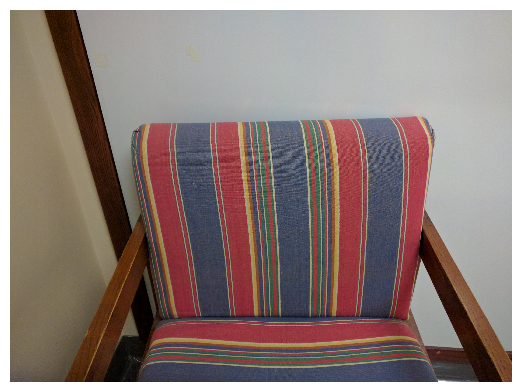

Image has shape: (3088, 4160, 3)
Small image has shape: (1544, 2080, 3)


In [ ]:
import os
import warnings
import numpy as np

from skimage import io, transform, img_as_ubyte
from matplotlib import pyplot as plt


# Read image
image = io.imread(fname="./pictures/chair.jpg")

# Display image
plt.matshow(image)
plt.axis("off")
plt.show()

# Resize the image
print("Image has shape:", image.shape)
new_shape = (image.shape[0] >> 1, image.shape[1] >> 1, image.shape[2])
small = transform.resize(image=image, output_shape=new_shape)
print("Small image has shape:", small.shape)

# UserWarning: Possible precision loss when converting from float64 to uint8
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Save a new version in .tif format
    io.imsave(fname="./pictures/chair2.tif", arr=img_as_ubyte(small))

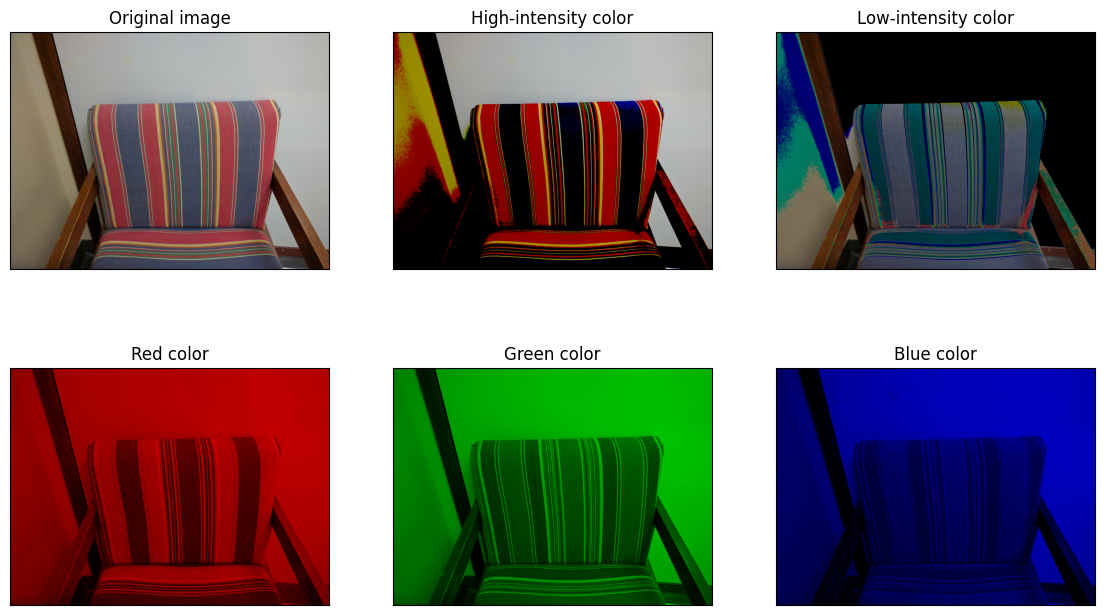

In [ ]:
i = image.copy()
j = image.copy()
r = image.copy()
g = image.copy()
b = image.copy()

i[i < 128] = 0  # keep only high-intensity pixels (white color)
j[j > 128] = 0  # keep only low-intensity pixels (black color)

r[:,:,1] = 0  # keep only red color
r[:,:,2] = 0

g[:,:,0] = 0  # keep only green color
g[:,:,2] = 0

b[:,:,0] = 0  # keep only blue color
b[:,:,1] = 0

plt.figure(figsize=(14, 8))

ax = plt.subplot(231)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_title("Original image")
plt.imshow(image)

ax = plt.subplot(232)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_title("High-intensity color")
plt.imshow(i)

ax = plt.subplot(233)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_title("Low-intensity color")
plt.imshow(j)

ax = plt.subplot(234)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_title("Red color")
plt.imshow(r)

ax = plt.subplot(235)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_title("Green color")
plt.imshow(g)

ax = plt.subplot(236)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
ax.set_title("Blue color")
plt.imshow(b)

plt.show()

## Get histogram from image

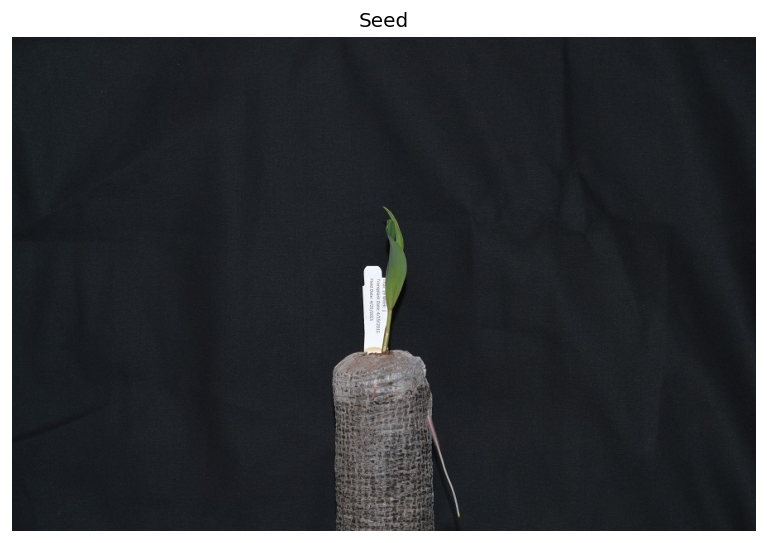

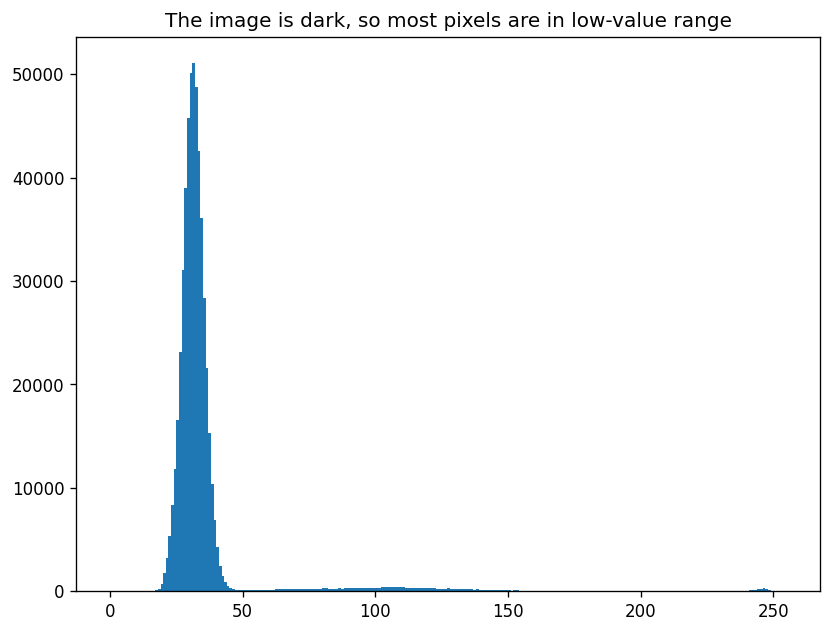

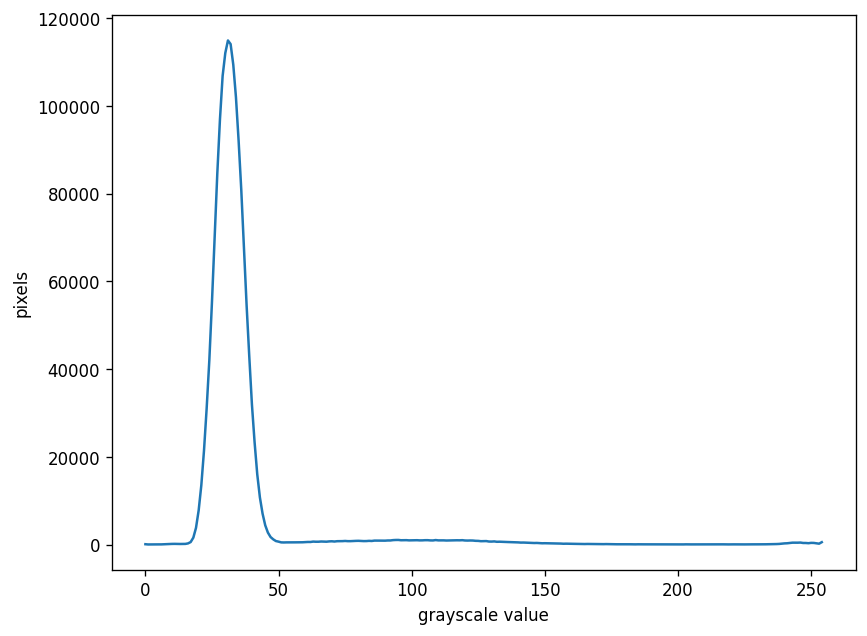

In [ ]:
image_seed = "./pictures/seed.jpg"
image = get_image(image_seed)

show_image(image, SIZE, "Seed")
show_hist(image_seed, SIZE, "The image is dark, so most pixels are in low-value range")
show_np_hist(image, SIZE)

## Thresholding

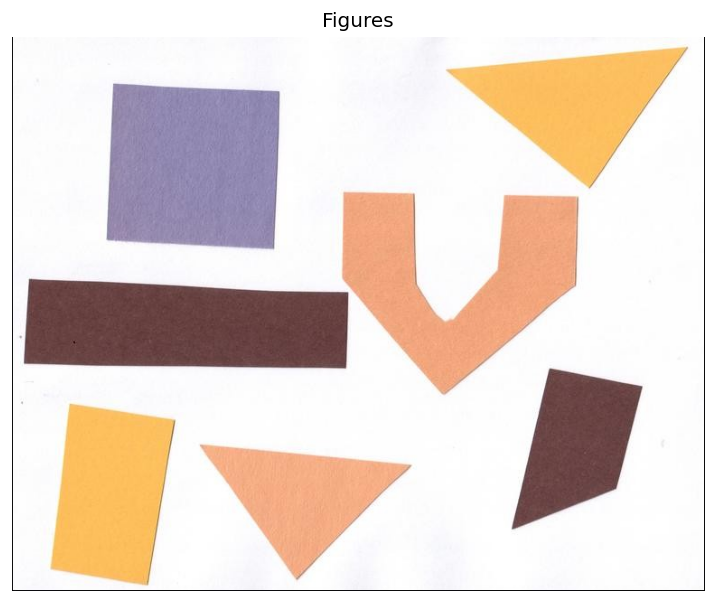

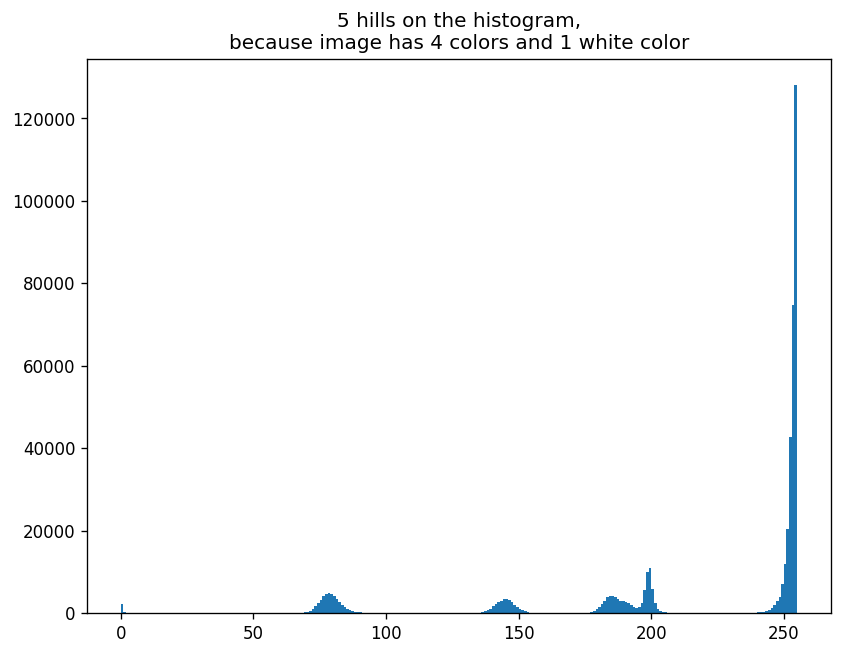

In [ ]:
image_figures = "./pictures/contours_figures.jpg"
image = get_image(image_figures)

show_image(image, SIZE, "Figures")
show_hist(image_figures, SIZE,
    f"5 hills on the histogram,\n"
    f"because image has 4 colors and 1 white color")

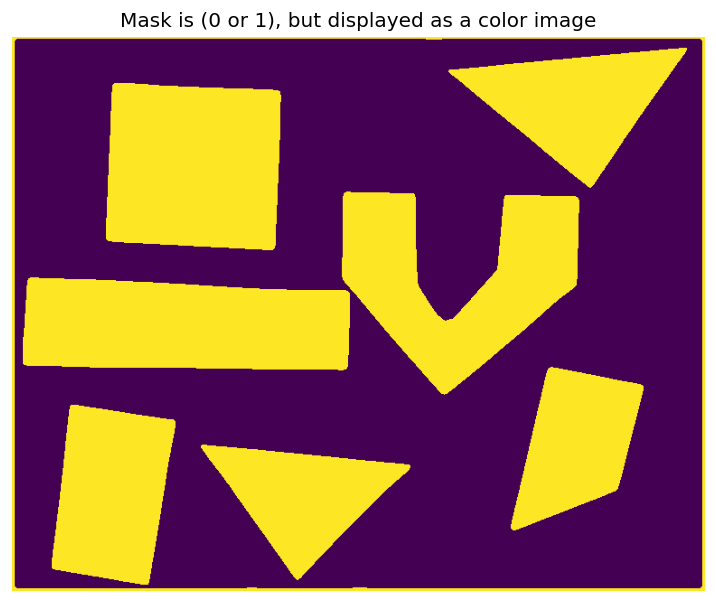

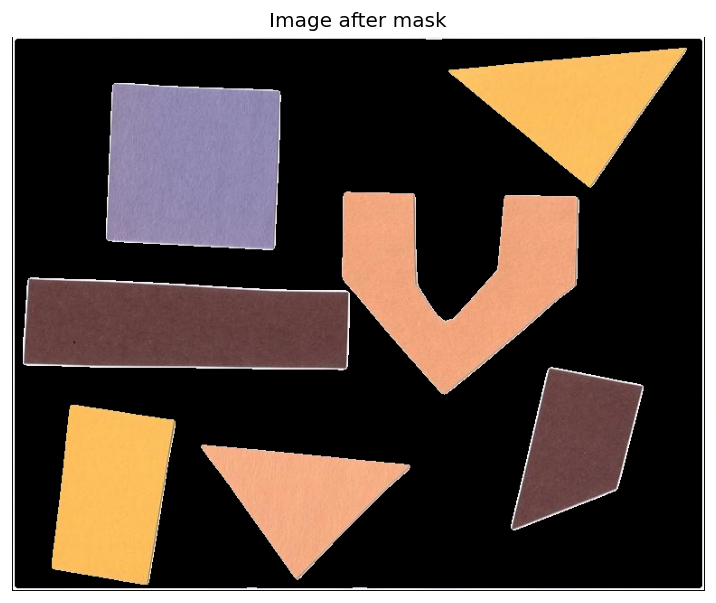

In [ ]:
import skimage


# Set constants
threshold = 220 / 255
sigma = 2

# Blur and grayscale before thresholding
blur = skimage.color.rgb2gray(image)  # convert RGB to gray image
blur = skimage.filters.gaussian(blur, sigma=sigma)  # blur image

# Perform inverse binary thresholding
mask = blur < threshold  # get mask using threshold

# Use the mask to select the "interesting" part of the image
select = np.zeros_like(image)
select[mask] = image[mask]  # set mask on image

# Display the result
show_image(mask, SIZE, "Mask is (0 or 1), but displayed as a color image")
show_image(select, SIZE, "Image after mask")

Use [Otsu adaptive thresholding](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html) algorithm.

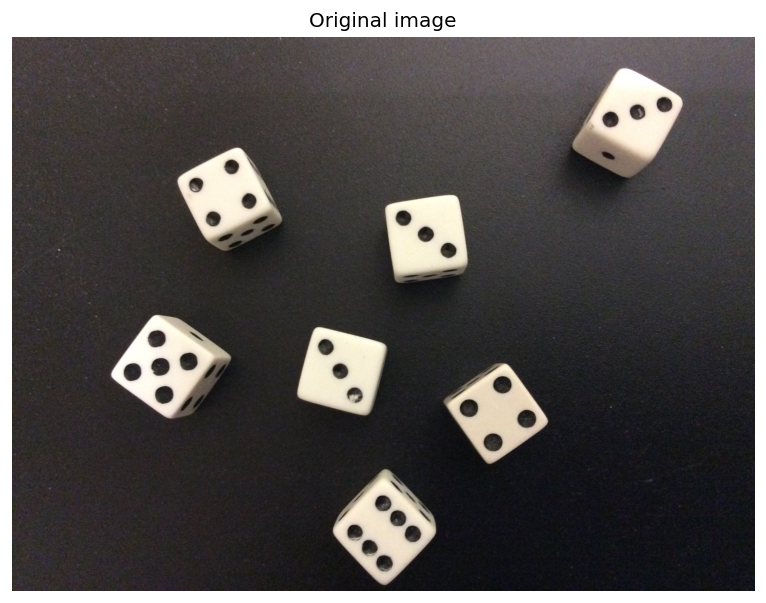

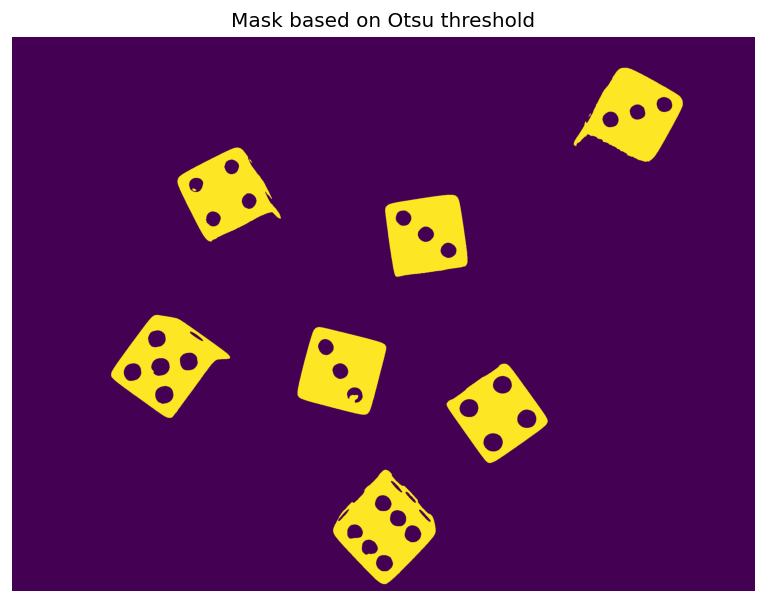

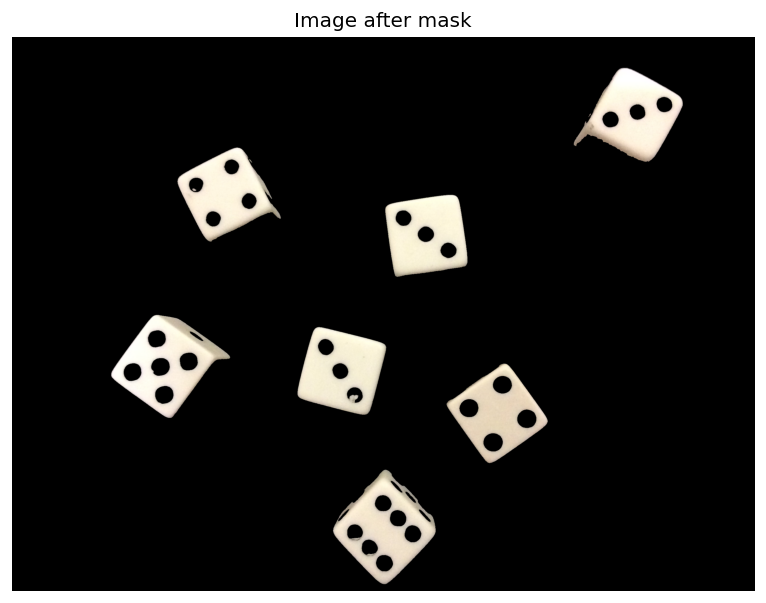

In [ ]:
import skimage


# Get image
image_dice = "./pictures/contours_dice.jpg"
image = get_image(image_dice)
show_image(image, SIZE, "Original image")

# Set constants
sigma = 2

# Blur and grayscale before thresholding
blur = skimage.color.rgb2gray(image)  # convert RGB to gray image
blur = skimage.filters.gaussian(blur, sigma=sigma)  # blur image

# Perform adaptive thresholding
threshold = skimage.filters.threshold_otsu(blur)  # Otsu threshold
mask = blur > threshold

# Use the mask to select the "interesting" part of the image
select = np.zeros_like(image)
select[mask] = image[mask]

# Display the result
show_image(mask, SIZE, "Mask based on Otsu threshold")
show_image(select, SIZE, "Image after mask")

## Edge Detection

Use [Canny Edge Detection](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html) algorithm.

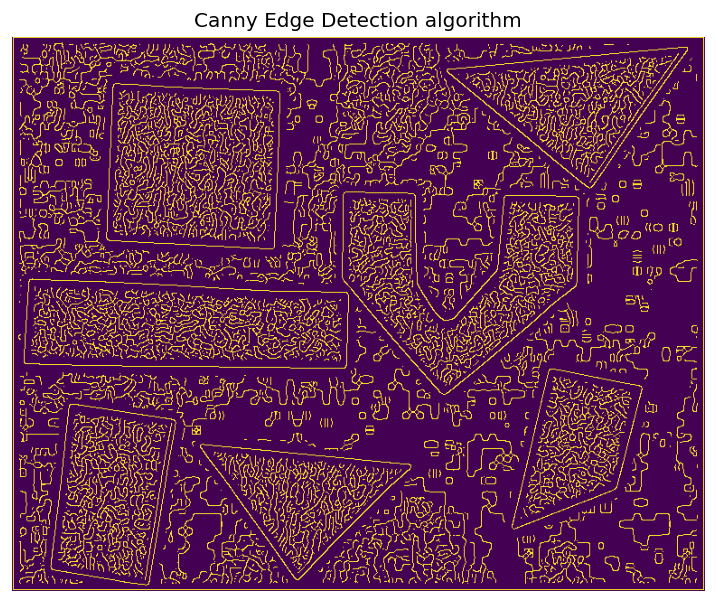

In [ ]:
from skimage import feature


gray = get_gray(image_figures)

# Use Canny edge detection algorithm
edges = feature.canny(
    image=gray,
    sigma=2.0,
    low_threshold=0.1,
    high_threshold=0.3)

show_image(edges, size=SIZE, title="Canny Edge Detection algorithm")

## Contours
The difference between **edges** and **contours** is significant. When we perform edge detection, we find the points where the intensity of colors changes significantly, and turn those pixels on, while turning the rest of the pixels off. The edge pixels are in an image, and there is no particular requirement that the pixels representing an edge are all contiguous.

**[Contours](https://docs.opencv.org/4.x/d3/d05/tutorial_py_table_of_contents_contours.html) are not necessarily part of an image**, unless we choose to draw them. Rather, contours are abstract collections of points and / or line segments corresponding to the shapes of the objects in the image. Thus, they can be manipulated by our programs; we can count the number of contours, use them to categorize the shapes in the object, use them to crop objects from an image, and more. So, let us see how to find contours in an image, and use the contours to determine the number of objects in the image.

In [ ]:
import cv2


def get_contours(image,
                 mode=cv2.RETR_EXTERNAL,  # find outermost contours by default
                 method=cv2.CHAIN_APPROX_SIMPLE):
    """ Find contours both for OpenCV v3.x and v4.x. """
    # Find the outermost contours, based on the binary dice image
    output = cv2.findContours(image=image, mode=mode, method=method)
    if len(output) == 3:  # (_, contours, hierarchy)
        return (output[1], output[2])
    elif len(output) == 2:  # (contours, hierarchy)
        return output


def show_contours(name, thresh, size, title, inv=False, mode=cv2.RETR_EXTERNAL):
    """ Draw contours on the image and show it. """
    # Create binary image
    gray = get_gray(name)
    blur = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
    type = cv2.THRESH_BINARY_INV if inv else cv2.THRESH_BINARY
    t, binary = cv2.threshold(src=blur, thresh=thresh, maxval=255, type=type)

    # Find outermost contours
    contours, _ = get_contours(
        image=binary,
        mode=mode,  # find outermost contours by default
        method=cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the image
    image = get_image(name)
    cv2.drawContours(image=image, contours=contours, contourIdx=-1,
                     color=(255, 0, 0), thickness=5)
    show_image(image, size, title)


# Not all contours match the objects.
image_dice2 = "./pictures/contours_dice2.jpg"
image_dots = "./pictures/contours_dots.jpg"

# Invert the image, because the contours stand out well against the dark background.
# It is also necessary to get the inner contours, since this image has a black border.
# Set the threshold to 210.
show_image(get_image(image_figures), SIZE, "Original image")
show_hist(image_figures, SIZE, "Figures histogram")
show_contours(image_figures, thresh=210, size=SIZE, title="Image with contours",
              inv=True, mode=cv2.RETR_TREE)

# Set the threshold to 195.
show_image(get_image(image_dice), SIZE, "Original image")
show_hist(image_dice, SIZE, "Dice histogram")
show_contours(image_dice, 195, SIZE, "Image with contours")

# Set the threshold to 190.
show_image(get_image(image_dice2), SIZE, "Original image")
show_hist(image_dice2, SIZE, "Dice2 histogram")
show_contours(image_dice2, 190, SIZE, "Image with contours")

# Invert the image, because the contours stand out well against the dark background.
# Set the threshold to 199.
show_image(get_image(image_dots), SIZE, "Original image")
show_hist(image_dots, SIZE, "Dots histogram")
show_contours(image_dots, 199, SIZE, "Image with contours", inv=True)


# The threshold for each image should be set individually
# according to its histogram.

Output hidden; open in https://colab.research.google.com to view.

### Using contours to count objects
The first parameter to the `cv2.findContours` function is the image to find contours in. Remember, this image should be binary, with the objects you wish to find contours for in white, against a black background. Second, we pass in a constant indicating what kind of contours we are interested in. Since we are interested in counting the objects in this image, we only care about the contours around the outermost edges of the objects, and so we pass in the `cv2.RETR_EXTERNAL` parameter. If we wished to have more information – say, contours associated with the pips on the faces of the dice – then we could use another parameter, such as `cv2.RETR_TREE` or `cv2.RETR_CCOMP`. See the OpenCV documentation [here](https://docs.opencv.org/trunk/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71) and [here](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html) for more information. The last parameter tells the function if it should simplify the contours or not. We pass in `cv2.CHAIN_APPROX_SIMPLE`, which tells the function to simplify by using line segments when it can, rather that including all the points on what would be a straight edge. Using this parameter saves memory and computation time in our program.

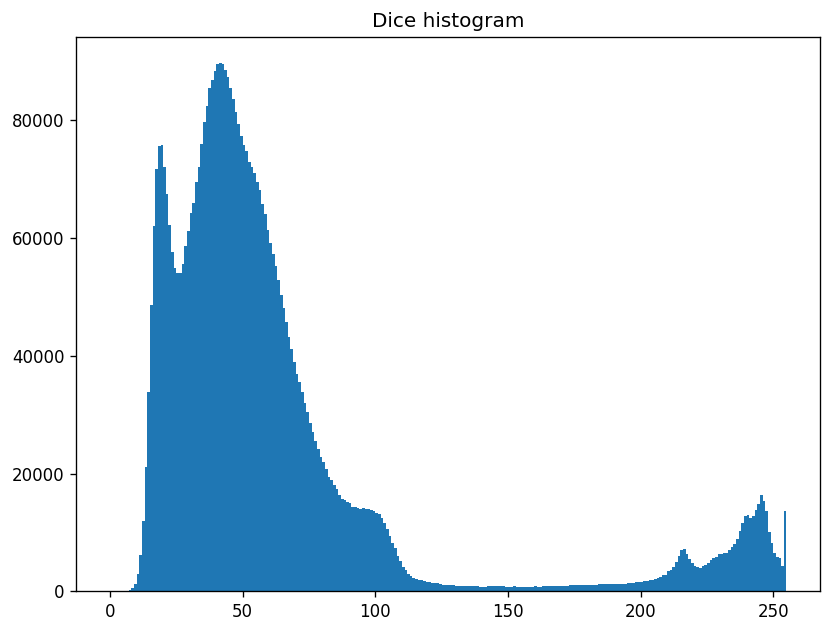

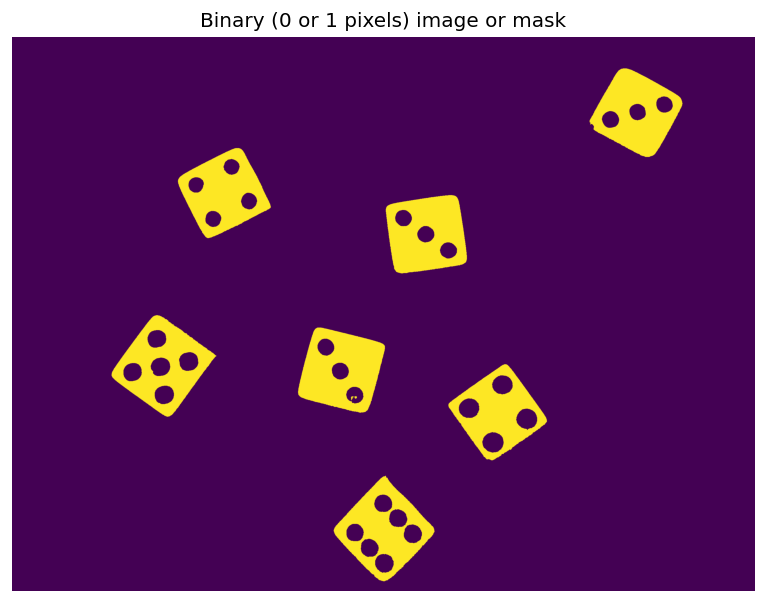

In [ ]:
# To get threshold you should make a histogram
show_hist(image_dice, SIZE, "Dice histogram")

# TRY TO CHANGE THE THRESHOLD FROM 195 TO 210 and check the number of dots.
threshold = 195  # choose threshold from the histogram above
# threshold = 200

# Create and show binary image (mask). Binary image has 0 or 1 pixels only.
gray = get_gray(image_dice)
blur = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
t, binary = cv2.threshold(src=blur, thresh=threshold,
                          maxval=255, type=cv2.THRESH_BINARY)
show_image(binary, size=SIZE, title="Binary (0 or 1 pixels) image or mask")

Found 7 objects.
	Size of contour 1: 436
	Size of contour 2: 479
	Size of contour 3: 479
	Size of contour 4: 480
	Size of contour 5: 325
	Size of contour 6: 620
	Size of contour 7: 568


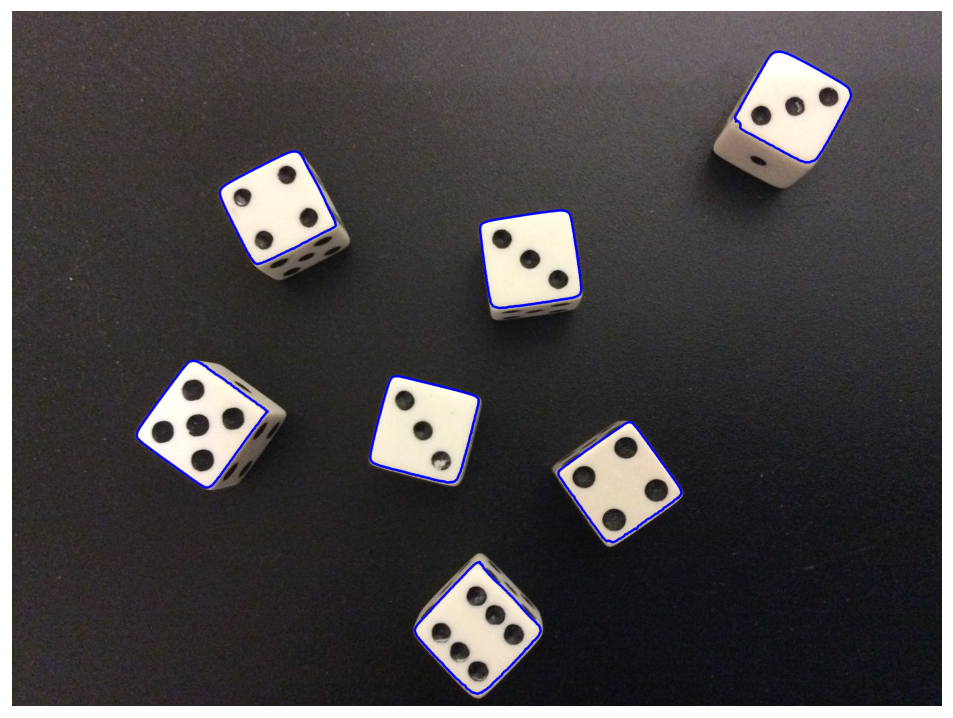

In [ ]:
# Find the outermost contours, based on the binary dice image
contours, hierarchy = get_contours(binary)

# Print information about found contours
print(f"Found {len(contours)} objects.")
for i, c in enumerate(contours, 1):
    print(f"\tSize of contour {i}: {len(c)}")

# Draw the contour points on the original image
image = get_image(image_dice)
cv2.drawContours(image=image, contours=contours,
                 contourIdx=-1, color=(0, 0, 255), thickness=5)
show_image(image)

### Understanding contour hierarchies

In [ ]:
# Find all contours hierarchy
contours, hierarchy = get_contours(
    image=binary,
    mode=cv2.RETR_TREE,  # find all contours hierarchy
    method=cv2.CHAIN_APPROX_SIMPLE)

# Print information about found contours
print(f"Found {len(contours)} contours.")
for i, c in enumerate(contours, 1):
    print(f"\tSize of contour {i}: {len(c)}")

# Print information about contours hierarchy
# [next, previous, first child, parent]
print(f"\n" f"Contours hierarchy\n"
      f"[next, previous, first_child, parent]:")
for i, h in enumerate(hierarchy[0]):
    print(f"\t{i}: {h}")

dice = {}  # dictionary of dice and dots in them

# Find dice contours
for i, c in enumerate(hierarchy[0]):
    if c[3] == -1:
        dice[i] = []  # new dice has found

# Find the number of dots on each dice.
for i, c in enumerate(hierarchy[0]):
    d = c[3]
    if d in dice:
        dice[d].append(i)

# Result
print("\n" f"There are {len(dice)} dice on the table.")
total_dots = 0
for i, (key, value) in enumerate(dice.items(), 1):
    dots = len(value)
    total_dots += dots
    print(f"Dice {i} with number {key} has {dots} dots: {value}")
print("Total dice dots:", total_dots)

Found 36 contours.
	Size of contour 1: 436
	Size of contour 2: 104
	Size of contour 3: 83
	Size of contour 4: 87
	Size of contour 5: 78
	Size of contour 6: 95
	Size of contour 7: 95
	Size of contour 8: 479
	Size of contour 9: 94
	Size of contour 10: 112
	Size of contour 11: 98
	Size of contour 12: 99
	Size of contour 13: 479
	Size of contour 14: 92
	Size of contour 15: 28
	Size of contour 16: 84
	Size of contour 17: 86
	Size of contour 18: 480
	Size of contour 19: 84
	Size of contour 20: 88
	Size of contour 21: 87
	Size of contour 22: 90
	Size of contour 23: 83
	Size of contour 24: 325
	Size of contour 25: 78
	Size of contour 26: 78
	Size of contour 27: 71
	Size of contour 28: 620
	Size of contour 29: 84
	Size of contour 30: 86
	Size of contour 31: 80
	Size of contour 32: 91
	Size of contour 33: 568
	Size of contour 34: 88
	Size of contour 35: 86
	Size of contour 36: 76

Contours hierarchy
[next, previous, first_child, parent]:
	0: [ 7 -1  1 -1]
	1: [ 2 -1 -1  0]
	2: [ 3  1 -1  0]
	3: 

dict_keys([0, 7, 12, 17, 23, 27, 32])
[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 33, 34, 35]


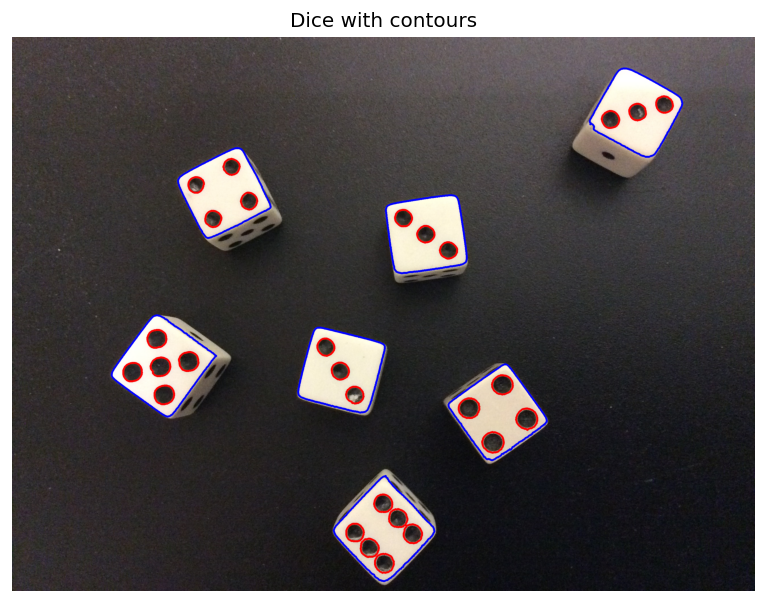

In [ ]:
# Draw all contours
dice_list = dice.keys()
print(dice_list)
dice_contours = list(map(contours.__getitem__, dice_list))

dots_list = []
for dots in dice.values():
    dots_list.extend(dots)
print(dots_list)
dots_contours = list(map(contours.__getitem__, dots_list))

image = get_image(image_dice)
cv2.drawContours(image=image, contours=dice_contours,
                 contourIdx=-1, color=(0, 0, 255), thickness=5)
cv2.drawContours(image=image, contours=dots_contours,
                 contourIdx=-1, color=(255, 0, 0), thickness=5)
show_image(image, SIZE, "Dice with contours")

If you change the threshold from 195 to 200, the number of dots found on the dice will change from 28 to 27 dots.

The total dots **should be 28**, not 27, should it not? What went wrong? The answer lies in the dots contours for the die showing 6 dots.

That die with 6 dots happens to be associated with the contour with index zero, which only has five children in the hierarchy. If we draw only the first contour in the first die, we see this: **there are 2 merged dots**. Two dots merged in one contour.

We might have been able to prevent that problem when taking the image, when blurring the image, or when making the binary image with thresholding. Care must be taken when working with image processing, especially in scientific applications, to make sure that the results reported by the program are reliable.

In [ ]:
threshold = 200  # change threshold from 195 to 200

gray = get_gray(image_dice)  # converto to gray
blur = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)  # blur
t, binary = cv2.threshold(src=blur, thresh=threshold,
                          maxval=255, type=cv2.THRESH_BINARY)  # get binary mask

# Find contours with threshold = 200
contours, hierarchy = get_contours(
    image=binary,
    mode=cv2.RETR_TREE,  # find all contours hierarchy
    method=cv2.CHAIN_APPROX_SIMPLE)

# Draw "wrong" contours
wrong_contours1 = []  # list of "wrong" contours
wrong_contours2 = []

print("Two contours inside a dot:")
for i, c in enumerate(hierarchy[0]):
    if c[3] == 12:  # 2 contours inside a dot
        wrong_contours1.append(contours[i])
        print(f"\t" f"Wrong contour {i}")

print(f"------\n" f"Two dots are merged together in one contour:")
for i, c in enumerate(hierarchy[0]):
    if c[0] == 2:  # 2 dots are merged together
        wrong_contours2.append(contours[i])
        print(f"\t" f"Wrong contour {i}")

image = get_image(image_dice)
cv2.drawContours(image=image, contours=wrong_contours1, contourIdx=-1,
                 color=(255, 0, 0), thickness=2)
cv2.drawContours(image=image, contours=wrong_contours2, contourIdx=-1,
                 color=(0, 0, 255), thickness=2)

show_image(image, size=(20, 20), title="Wrong contours")

Output hidden; open in https://colab.research.google.com to view.

## Bounding boxes and cropping
Find **bounding boxes**. A bounding box is the smallest rectangle that completely contains a given contour.

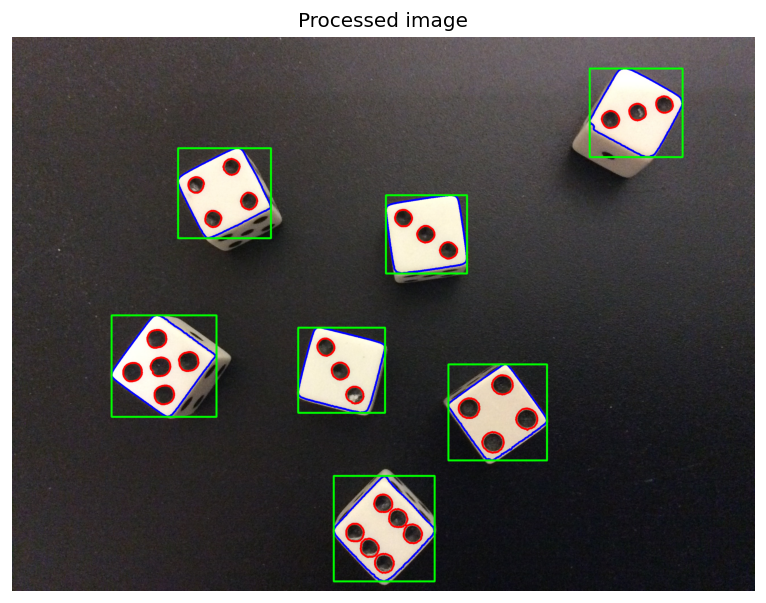

In [ ]:
# Draw bounding boxes around dice contours
image = get_image(image_dice)

cv2.drawContours(image=image, contours=dice_contours, contourIdx=-1,
                 color=(0, 0, 255), thickness=5)

cv2.drawContours(image=image, contours=dots_contours, contourIdx=-1,
                 color=(255, 0, 0), thickness=5)

for i in dice_contours:
    x, y, w, h = cv2.boundingRect(i)
    cv2.rectangle(img=image, pt1=(x, y), pt2=(x+w, y+h),
                  color=(0, 255, 0), thickness=5)
show_image(image, size=SIZE, title="Processed image")

# Save image
from PIL import Image
im = Image.fromarray(image)
im.save("contours_dice_processed.jpg")

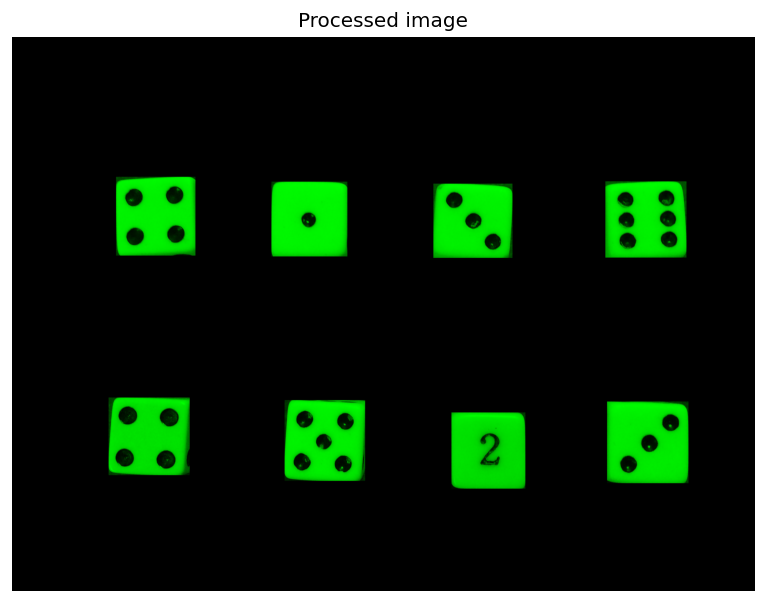

In [ ]:
# Crop the image using bounding boxes
image = get_image(image_dice2)

# Create binary image
threshold = 190
gray = get_gray(image_dice2)
blur = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
t, binary = cv2.threshold(src=blur, thresh=threshold,
                          maxval=255, type=cv2.THRESH_BINARY)

# Find outermost contours
contours, _ = get_contours(
    image=binary,
    mode=cv2.RETR_EXTERNAL,  # find outermost contours
    method=cv2.CHAIN_APPROX_SIMPLE,
)

# Create all-black mask image
mask = np.zeros(shape=image.shape, dtype="uint8")
for i in contours:
    x, y, w, h = cv2.boundingRect(i)  # get a bounding box
    cv2.rectangle(img=mask, pt1=(x, y), pt2=(x+w, y+h),
                  color=(0, 255, 0), thickness=-1)

# Apply mask to the original image
image = cv2.bitwise_and(src1=image, src2=mask)

show_image(image, size=SIZE, title="Processed image")

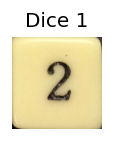

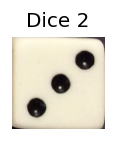

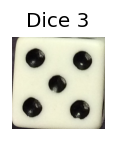

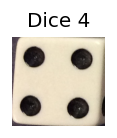

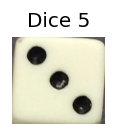

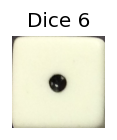

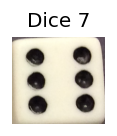

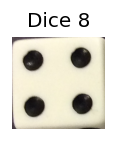

In [ ]:
# Extract dice images
image = get_image(image_dice2)
for i, c in enumerate(contours, 1):
    x, y, w, h = cv2.boundingRect(c)
    one_dice_image = image[y : y + h, x : x + w, :]
    show_image(one_dice_image, (1, 1), f"Dice {i}")

## Getting more information from contours: image moments

Once we have the contours, we can use them to get the [**image moments**](https://docs.opencv.org/4.x/d0/d49/tutorial_moments.html) for the corresponding objects in the image. The moments of an object are weighted averages of pixel intensities, or functions upon those averages, and the precise details of the mathematics involved is fairly complicated. Luckily, we can easily use moments to determine things like the center of an object, the area inside a contour, and more, **without worrying about the mathematics behind the scenes**.

The grayscale histogram for `"contours_dots.jpg"` image shows that there is a large spike, representing the white background, just above 200.

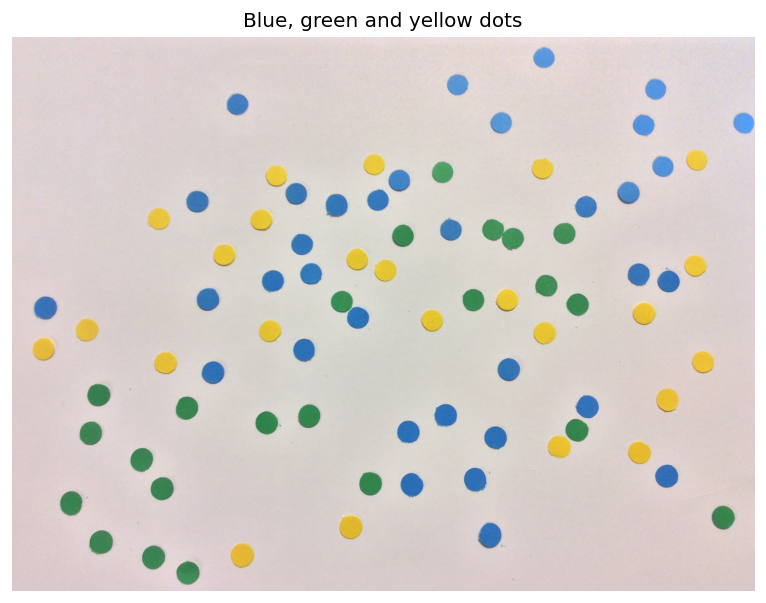

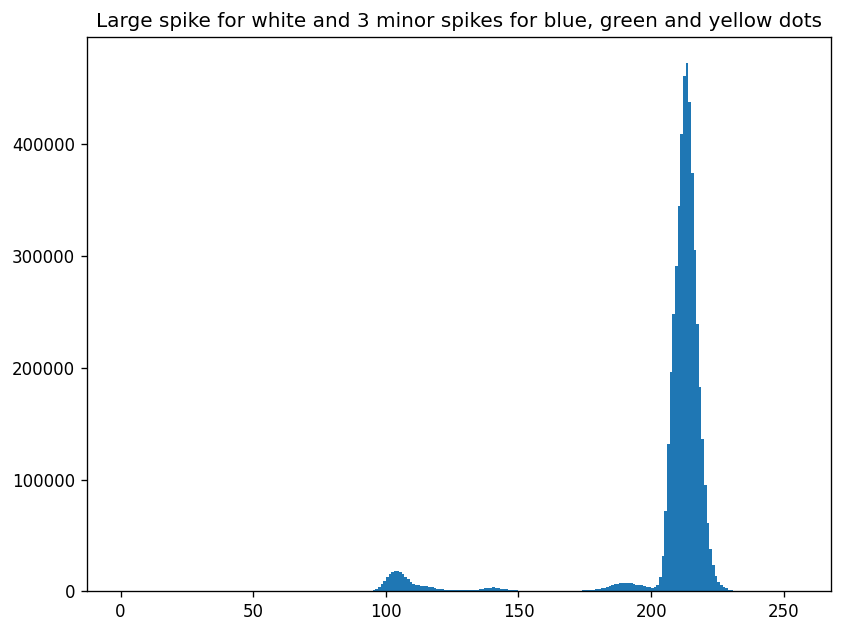

In [ ]:
show_image(get_image(image_dots), SIZE, "Blue, green and yellow dots")
show_hist(image_dots, SIZE, f"Large spike for white "
    f"and 3 minor spikes for blue, green and yellow dots")

Our strategy for counting the number of **yellow** dots is as follows:
  01. Read the image, make a grayscale version, blur it, and apply thresholding to create a binary image.
  02. Use the binary image to find the contours in the image.
  03. Determine the average size of the contours. This will be used to ignore small contours that represent noise rather than dots.
  04. Iterate through the contours, and for all contours that are big enough:
      * Using the moments of the contour, find the contour centroid.
      * Determine the average color around the contour centroid.
      * Find the Euclidean distance between the average color and three reference colors: yellow, blue, and green.
      * If the average color is closest the the yellow reference color, add one to the count of yellow dots
  05. Output the number of yellow dots.

Dots total: 80
Yellow dots: 24


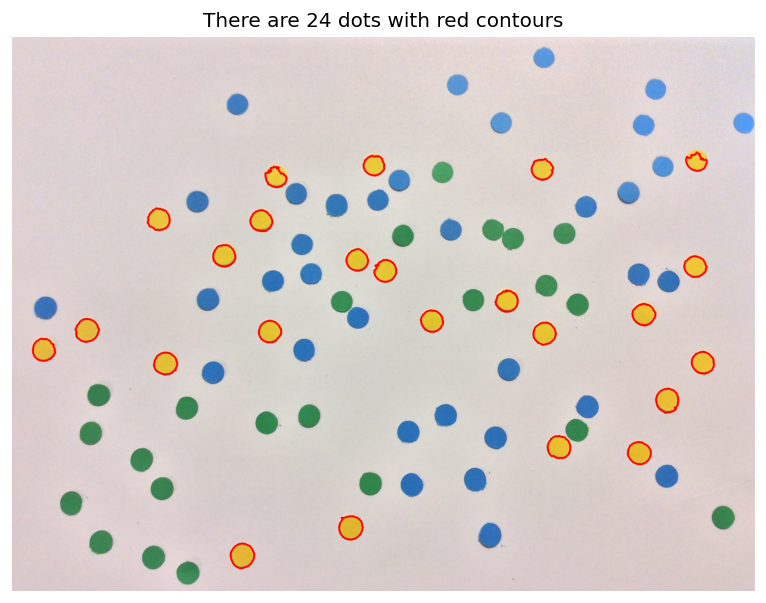

In [ ]:
# Count yellow dots on the image
image = get_image(image_dots)
cv2_img = cv2.imread(image_dots)  # read image


def color_distance(color1, color2):
    """ Compute distance between two colors,
        as a 3D Euclidean distance. """
    # Compute sum of square of differences between each channel
    d = (color1[0] - color2[0])**2 + \
        (color1[1] - color2[1])**2 + \
        (color1[2] - color2[2])**2

    # Square root of sum is the Euclidean distance
    # between the two colors
    return math.sqrt(d)


def get_contours_2(name, thresh=200):
    """ Draw contours on the image and show it """
    # Create binary image
    gray = get_gray(name)
    blur = cv2.GaussianBlur(src=gray, ksize=(5, 5), sigmaX=0)
    # Get INVERTED binary image, because the image background is light.
    t, binary = cv2.threshold(src=blur, thresh=thresh, maxval=255,
                              type=cv2.THRESH_BINARY_INV)
    # Find outermost contours
    contours, _ = get_contours(
        image=binary,
        mode=cv2.RETR_EXTERNAL,  # find outermost contours
        method=cv2.CHAIN_APPROX_SIMPLE)

    return contours


# Determine average contours length
contours = get_contours_2(image_dots, 199)
avg = 0
for c in contours:
    avg += len(c)
avg /= len(contours)
avg /= 2  # avg = avg / 2

# create reference colors
YELLOW = (0, 255, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

yellow_count = 0  # number of yellow dots
yellow_contours = []  # list of yellow contours
i = 0
for c in contours:  # for each contour...
    if len(c) > avg:
        i += 1
        # Find centroid of shape
        M = cv2.moments(array=c)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        # Find average color for 9 pixel kernel around centroid
        b = cv2_img[cy - 4 : cy + 5, cx - 4 : cx + 5, 0]
        g = cv2_img[cy - 4 : cy + 5, cx - 4 : cx + 5, 1]
        r = cv2_img[cy - 4 : cy + 5, cx - 4 : cx + 5, 2]
        b_average = np.mean(b)
        g_average = np.mean(g)
        r_average = np.mean(r)
        color = (b_average, g_average, r_average)

        # Find distances to known reference colors
        dist = []
        dist.append(color_distance(YELLOW, color))
        dist.append(color_distance(GREEN, color))
        dist.append(color_distance(BLUE, color))

        # Which one is closest?
        min_dist = min(dist)
        # If it was yellow, count the shape
        if dist.index(min_dist) == 0:
            yellow_count += 1
            yellow_contours.append(c)

print("Dots total:", i)
print("Yellow dots:", yellow_count)

image = get_image(image_dots)
cv2.drawContours(image=image, contours=yellow_contours,
                 contourIdx=-1, color=(255, 0, 0), thickness=5)
show_image(image, SIZE, f"There are {yellow_count} dots with red contours")

There is an obstacle: *green and blue dots at the center of the image have one contour*.

Check it by changing string

`if dist.index(min_dist) == 0:`

to string

`if dist.index(min_dist) == 1:`

and to string

`if dist.index(min_dist) == 2:`.

## Measuring size based on a reference object
We can also use contours to automatically determine the size of objects in the image, based on a **reference object** we intentionally place into the image.

Test image `"contours_leaf.jpg"` was created with a flatbed scanner. The background was a plain white sheet of paper with a **one inch black square** placed in the upper left. The leaf was placed in front of the paper, the whole collection was placed on the scanner, and the image was captured. Since we know the size of the reference black square (1 inch), we can write a program to find the leaf and automatically determine its size. Our plan will be:

  01. Load the image as grayscale, blur it, threshold it, and find the contours.
  02. Find the contour corresponding to the reference square, and measure the number of pixels in the width and height of the square’s sides.
  03. Find the largest contour (which should be the leaf), and measure the number of pixels in its bounding rectangle sizes.
  04. Calculate the width and height of the leaf.

Leaf size is 3.62×7.43 cm 
and leaf area is 26.90 cm²


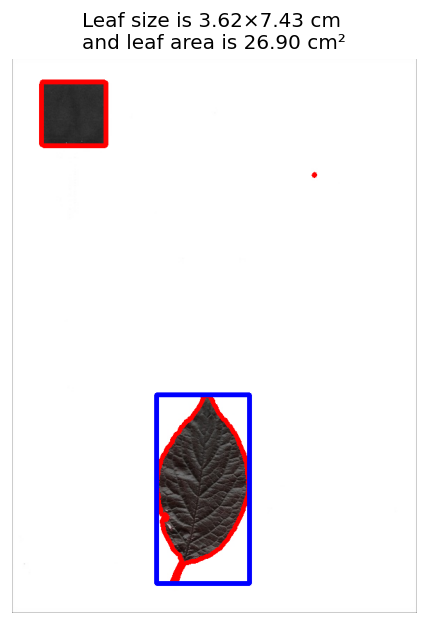

In [ ]:
image_leaf = "./pictures/contours_leaf.jpg"
contours = get_contours_2(image_leaf, 200)

# Determine average length of contours
avg = 0
for c in contours:
    avg += len(c)
avg /= len(contours)

# Get the largest contour
largest_id = -1
largest_size = -1
scale_x, scale_y = 0, 0
for i, c in enumerate(contours):
    if len(c) > largest_size:
        largest_size = len(c)
        largest_id = i

    # Now only look at the larger contours
    if len(c) > avg / 11:  # get only larger contours
        # Get approximating polygon
        epsilon = 0.1 * cv2.arcLength(curve=c, closed=True)
        approx = cv2.approxPolyDP(curve=c, epsilon=epsilon, closed=True)

        # The one with four vertices should be the reference black square
        if len(approx) == 4:  # black square has 4 vertices
            # Save bounding rectangle info
            x, y, w, h = cv2.boundingRect(c)

            # Calculate cm per pixels scale
            scale_x = 2.54 / w  # 1 insh is equal to 2.54 cm
            scale_y = 2.54 / h  # 1 insh is equal to 2.54 cm

# Get bounding box for the largest contour
x, y, w, h = cv2.boundingRect(contours[largest_id])
# Calculate height and width of the leaf
width = w * scale_x
height = h * scale_y

# Print results
title = (f"Leaf size is {width:0.2f}×{height:0.2f} cm \n"
        f"and leaf area is {(width*height):0.2f} cm²")
print(title)

image = get_image(image_leaf)
cv2.drawContours(image=image, contours=contours, contourIdx=-1,
                 color=(255, 0, 0), thickness=5)
cv2.rectangle(img=image, pt1=(x, y), pt2=(x+w, y+h),
              color=(0, 0, 255), thickness=5)

show_image(image, SIZE, title=title)